In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import lernnavi_preprocess as pp

rows = pp.load_mastery_array()
mastery_df_german, mastery_df_math = pp.get_mastery_dfs(rows)

---Starting data loading---
	-->Loading users...
		Users loaded
	-->Loading events...
		Events loaded
	-->Loading transactions...
		Transactions loaded
	-->Loading documents...
		Documents loaded
	-->Loading topics translated...
		Topics translated loaded
---Data loading finished!---


Parsing mastery levels...:   0%|          | 0/1093791 [00:00<?, ?it/s]

---Starting dataframe creation---
	-->Creating the initial dataframe...
		Initial dataframe created
	-->Starting feature extension, merging tables...
		Tables merged
	-->Finding weekly questions solved...
		Weekly questions solved found
	-->Finding weekly correct questions solved...
		Weekly correct questions solved found
	-->Finding weekly partially correct questions solved...
		Weekly partially correct questions solved found
	-->Finding weekly review task count...
		Weekly review task count found
	-->Finding weekly view count...
		Weekly view count found
	-->Finding weekly window visible ratio...
		Weekly window visible ratio found
	-->Constructing the final dataframes...
		Final dataframes constructed
---Dataframe creation finished! ---


In [2]:
from tqdm import notebook as vis

In [3]:
import cluster

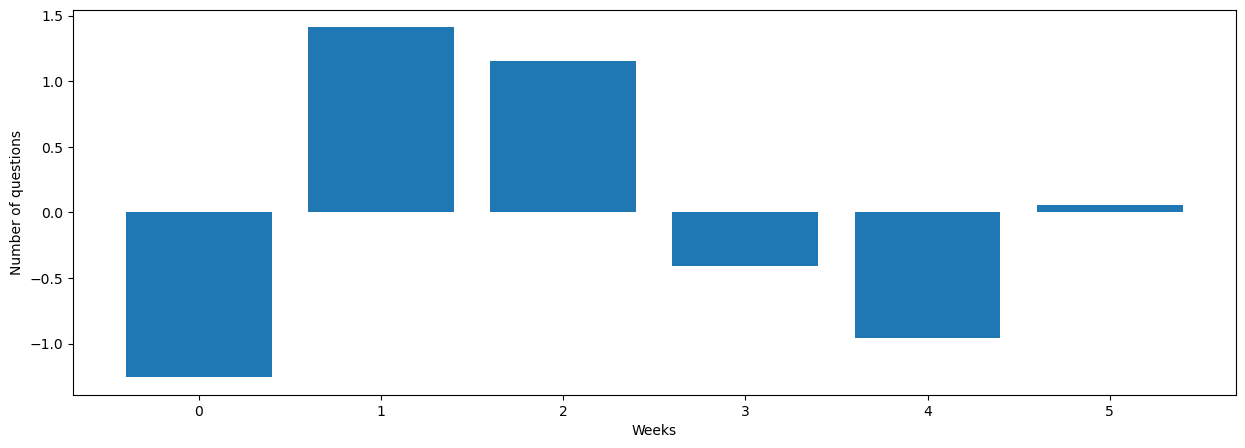

In [4]:
user_ids, data = cluster.prepare_data(mastery_df_german,6, True)
cluster.visualize_data(data[len(data)-1]) # We visualize one student's data

In [5]:
print(data.shape)
print("__________________________")
data

(1024, 6)
__________________________


array([[-0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,  2.23606798,
        -0.4472136 ],
       [-0.48087792, -0.8014632 , -0.41676087,  0.48087792,  2.01968728,
        -0.8014632 ],
       [ 2.23606798, -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.4472136 ],
       ...,
       [-0.71316586,  2.0750826 ,  0.30827169, -0.24385671, -0.79598512,
        -0.6303466 ],
       [-0.82230257,  1.883932  ,  0.17182442, -1.31936606,  0.02454635,
         0.06136586],
       [-1.2560152 ,  1.41125304,  1.15722749, -0.40926338, -0.95965206,
         0.05645012]])

In [6]:
len(user_ids)

1024

## WARNING START
##      BELOW CELLS TAKE A REALLY LONG TIME TO RUN!!!!

In [7]:
from tslearn.metrics import cdist_dtw
windows = [1,2]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  1


Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

window:  2


Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

In [8]:
windows = [3,4]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  3


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

window:  4


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

In [9]:
windows = [5,6]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  5


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

window:  6


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

In [73]:
D = cluster.get_distance_matrix(data, metric='e')
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
    if gamma == 0: continue
    #print("\tgamma: ", gamma)
    S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
    W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
    df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images/scaled/window={0}', filename=f'gamma_{gamma}.png')
    plt.close('all')

Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

## WARNING END

In [7]:
import pandas as pd
def get_original_rows(user_ids, labels, original_df, min_weeks=6):
    temp = original_df.merge(pd.DataFrame({'user_id': user_ids, 'cluster': labels}), on='user_id', how='inner')
    temp = temp[temp['weeks_since_first_transaction'] < min_weeks]
    temp = (temp.sort_values(['user_id', 'weeks_since_first_transaction'], ascending=True)
                .groupby('user_id')
                .agg({'num_questions': lambda x: list(x)}))
    temp = temp[temp['num_questions'].apply(lambda x: sum(x)) > 0]
    temp.reset_index(inplace=True)
    temp = np.asarray(temp.num_questions.values.tolist())
    return temp

In [ ]:
D_for_window = {
    window: cluster.get_distance_matrix(data, metric='dtw', window=window) if window != 0 else cluster.get_distance_matrix(data, metric='e') for window in range(0, 7)
}

window:  1
Number of clusters: 3, Label Length: 1024
Group 0 has 655 students
Group 1 has 171 students
Group 2 has 198 students


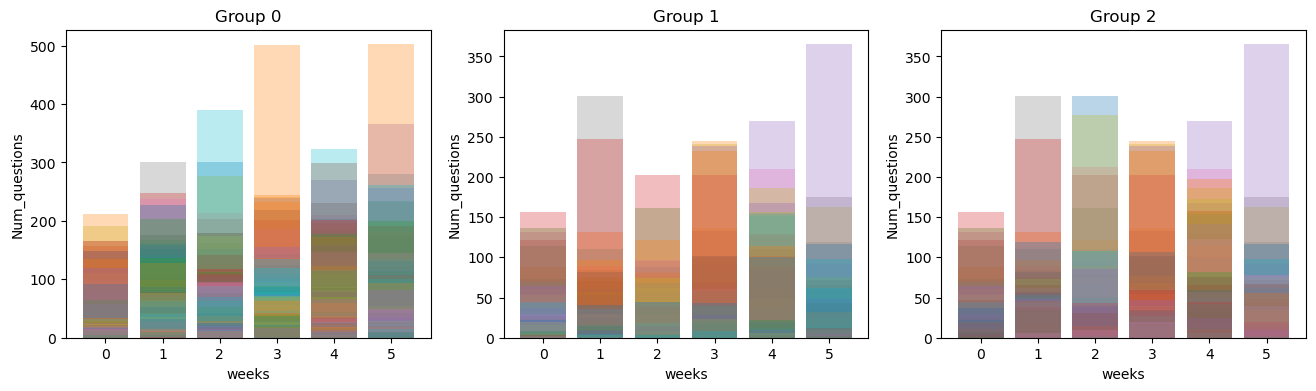

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 1024
Group 0 has 654 students
Group 1 has 174 students
Group 2 has 196 students


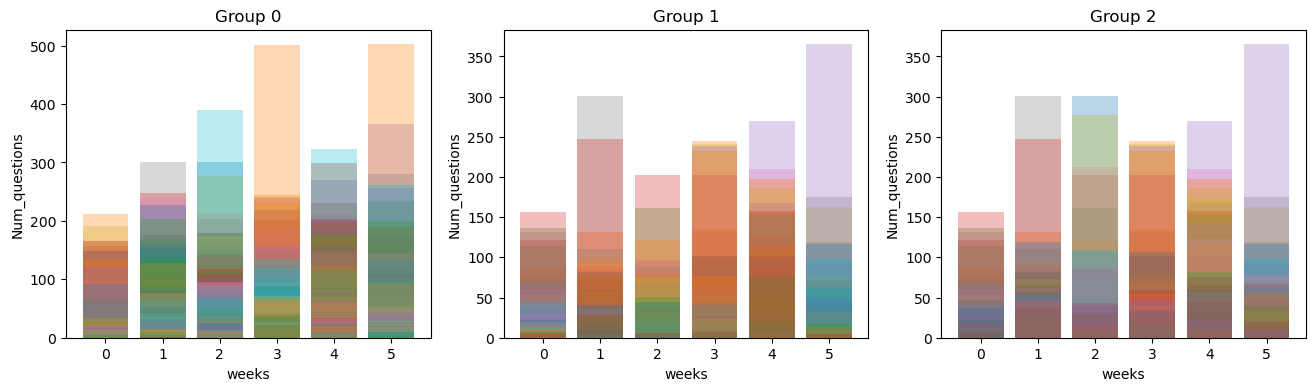

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


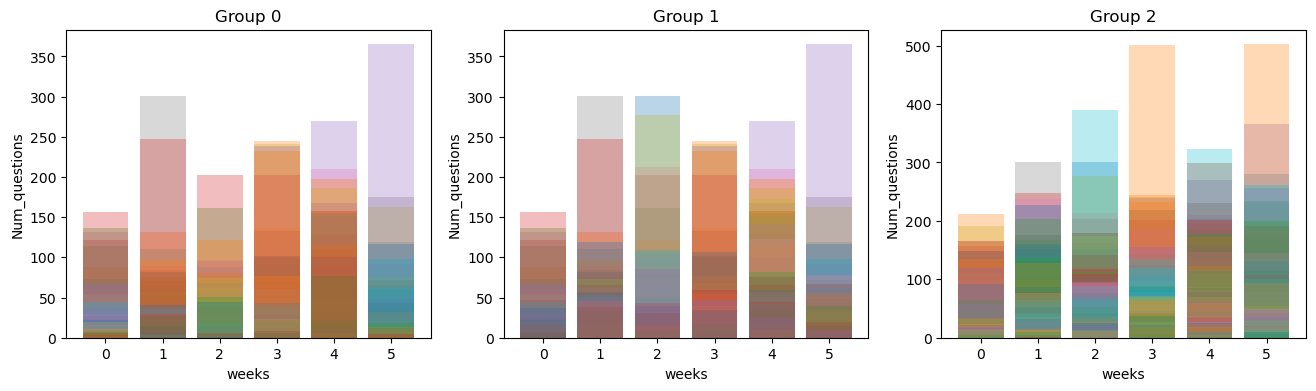

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


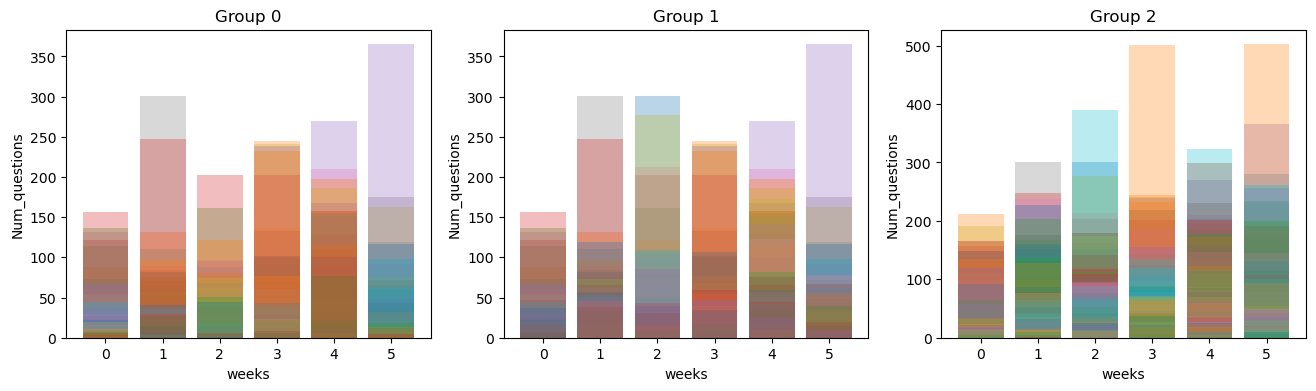

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


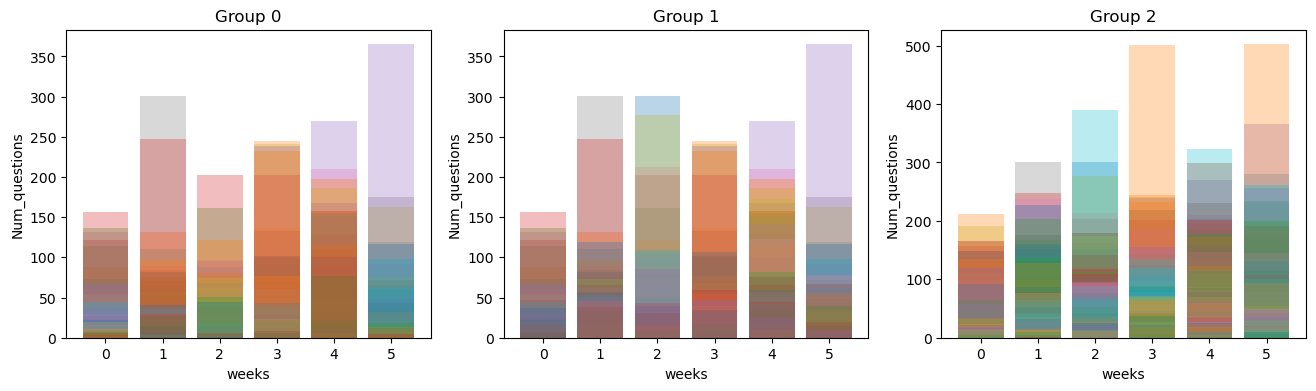

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


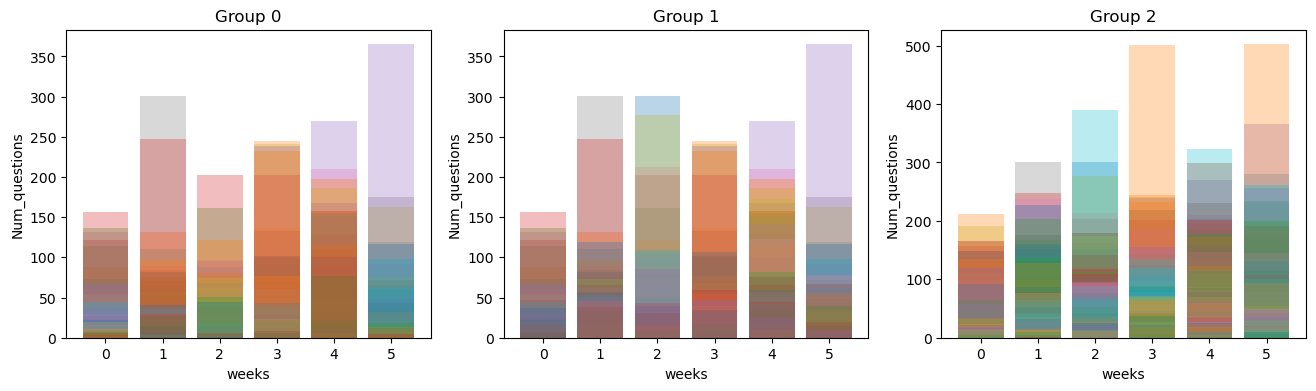

_________________________________________________________


In [15]:
gamma = 10
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids, kmeans.labels_, mastery_df_german, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

In [ ]:
gamma = 1
k = 3
for window in [4]:
    print("window: ", window)
    D = D_for_window[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S, connectivity='epsilon')
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids, kmeans.labels_, mastery_df_german, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  1
Group 0 has 849 students
Group 1 has 175 students


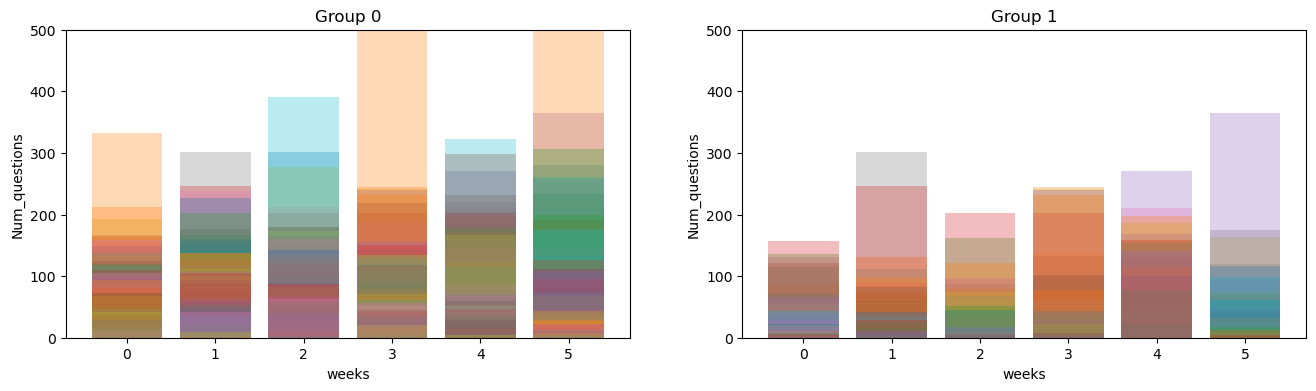

_________________________________________________________
window:  2
Group 0 has 854 students
Group 1 has 170 students


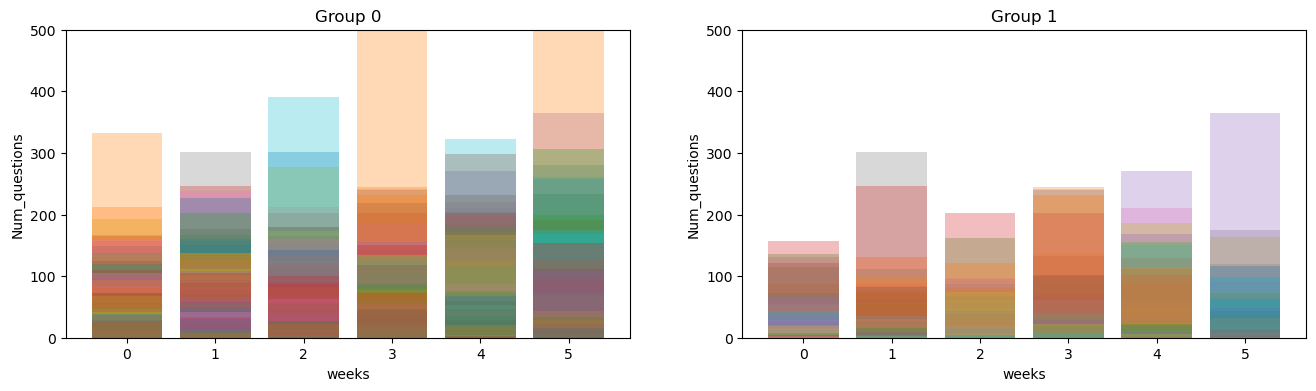

_________________________________________________________
window:  3
Group 0 has 854 students
Group 1 has 170 students


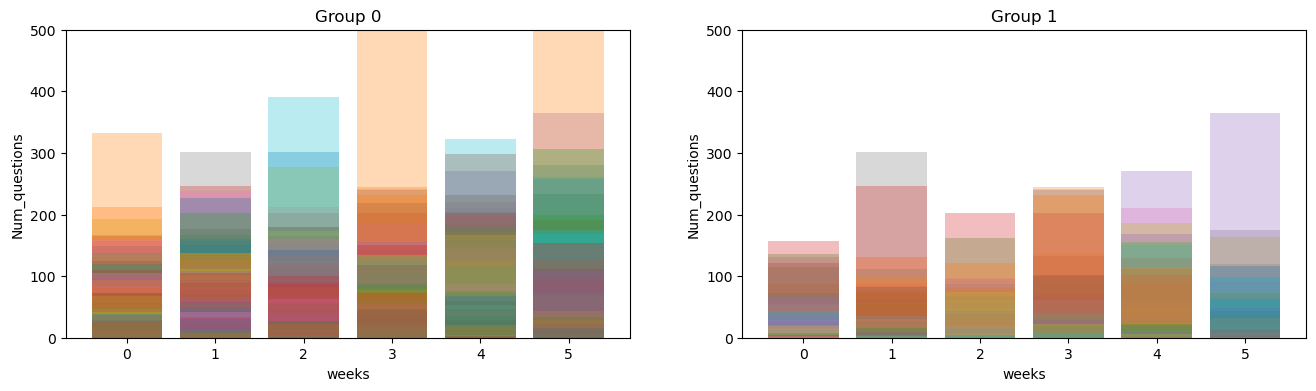

_________________________________________________________
window:  4
Group 0 has 854 students
Group 1 has 170 students


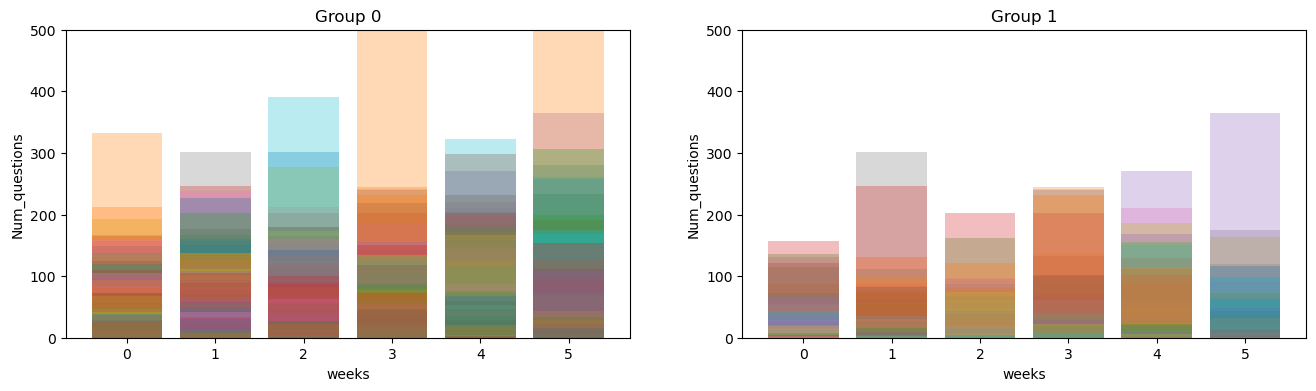

_________________________________________________________
window:  5
Group 0 has 854 students
Group 1 has 170 students


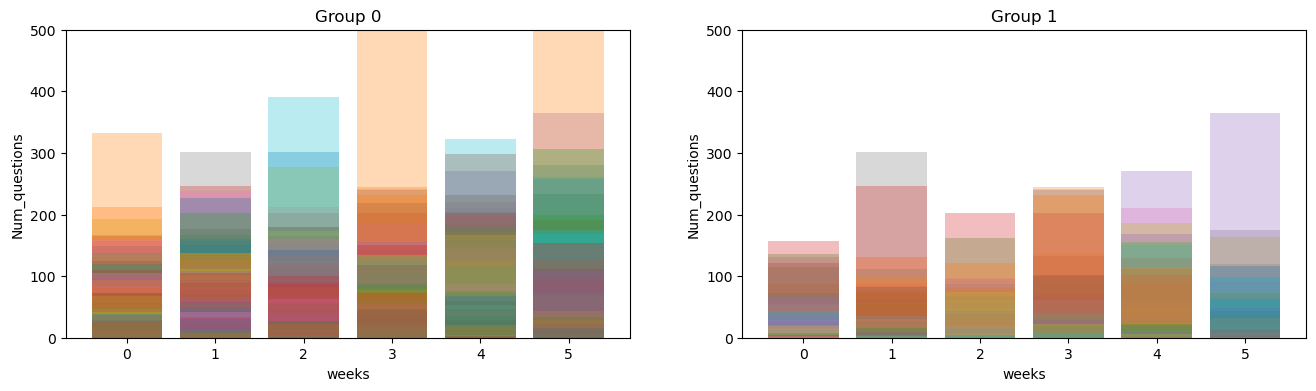

_________________________________________________________
window:  6
Group 0 has 854 students
Group 1 has 170 students


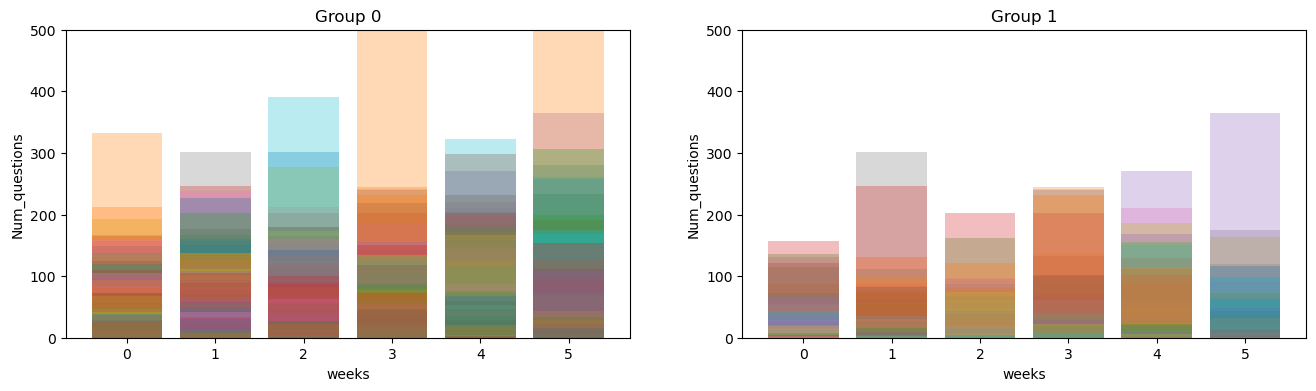

_________________________________________________________


In [13]:
# We select gamma = 30 and k = 3
gamma = 10
k = 2
for window in windows:
    print("window: ", window)
    D = D_for_window[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(data, kmeans.labels_, 6)
    print("_________________________________________________________")

window:  1
Group 0 has 366 students
Group 1 has 78 students


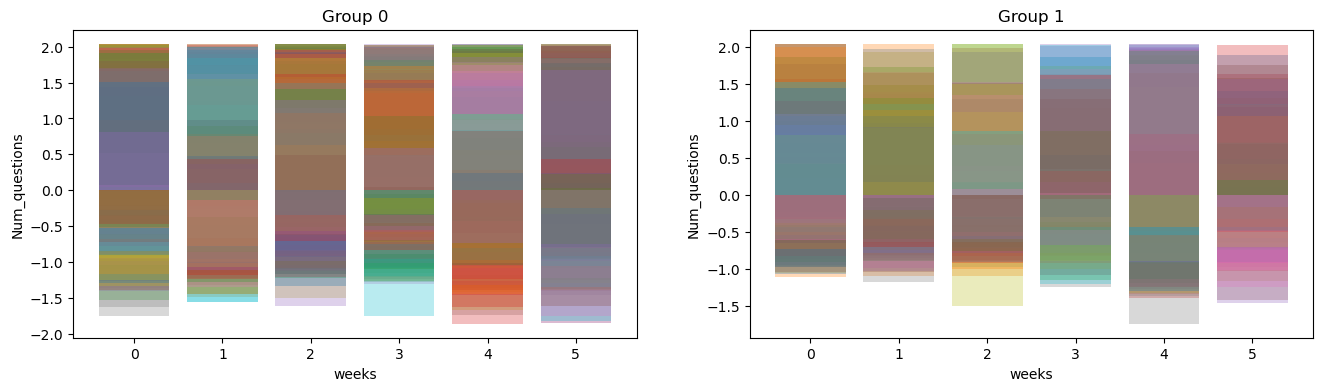

_________________________________________________________
window:  2
Group 0 has 367 students
Group 1 has 77 students


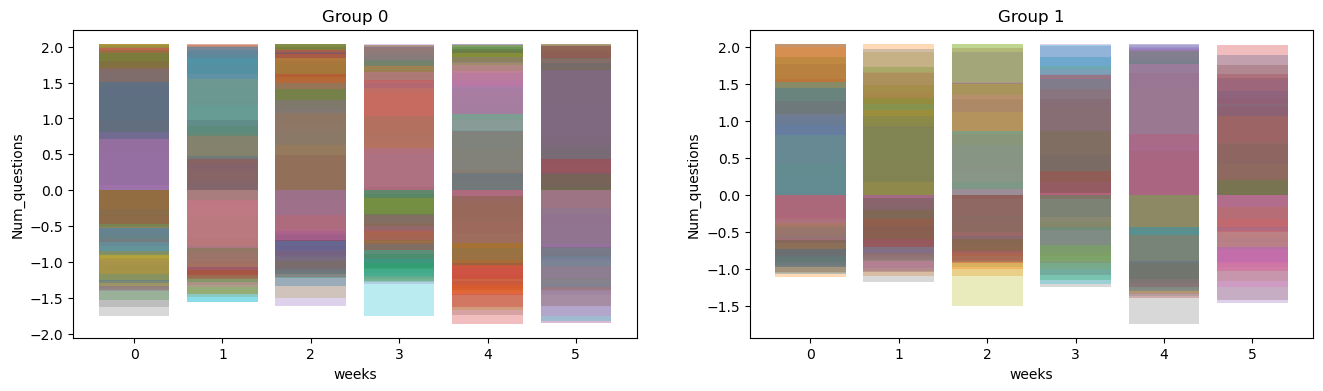

_________________________________________________________
window:  3
Group 0 has 369 students
Group 1 has 75 students


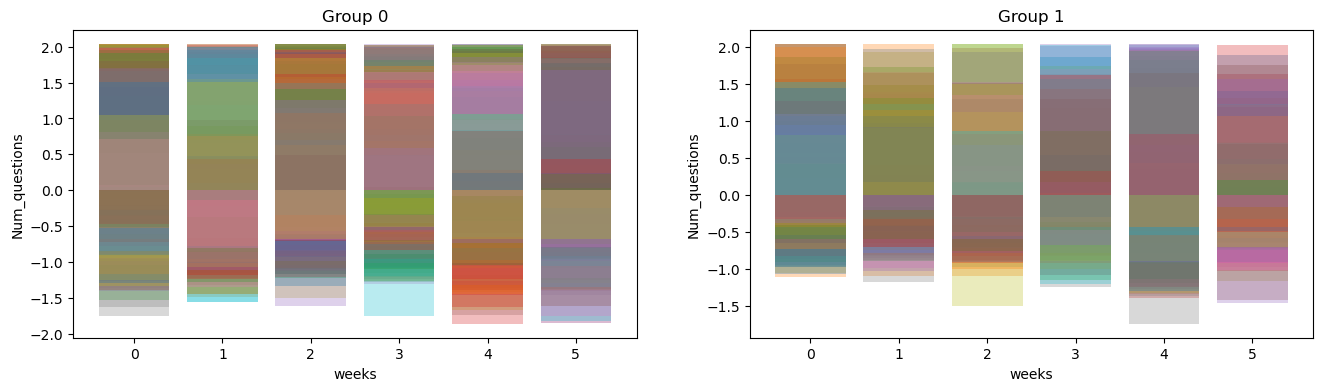

_________________________________________________________
window:  4
Group 0 has 369 students
Group 1 has 75 students


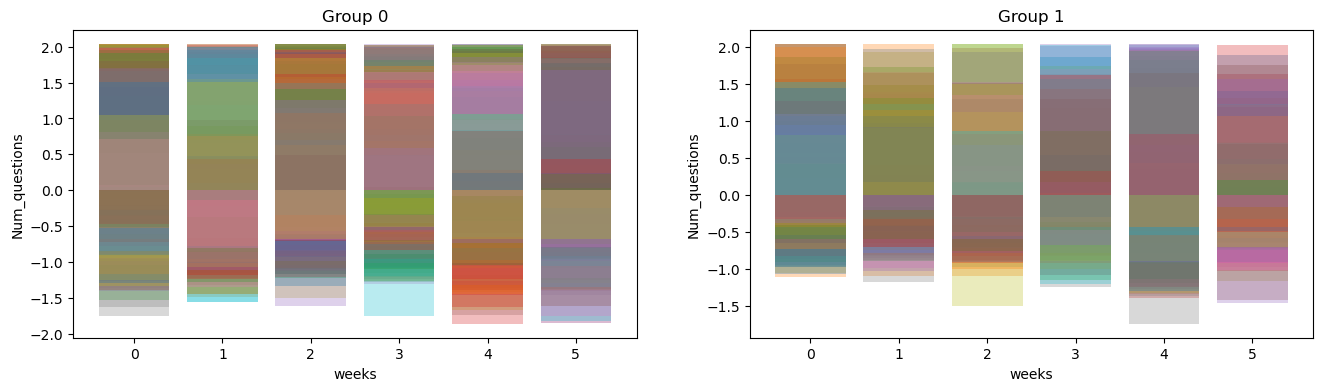

_________________________________________________________
window:  5
Group 0 has 369 students
Group 1 has 75 students


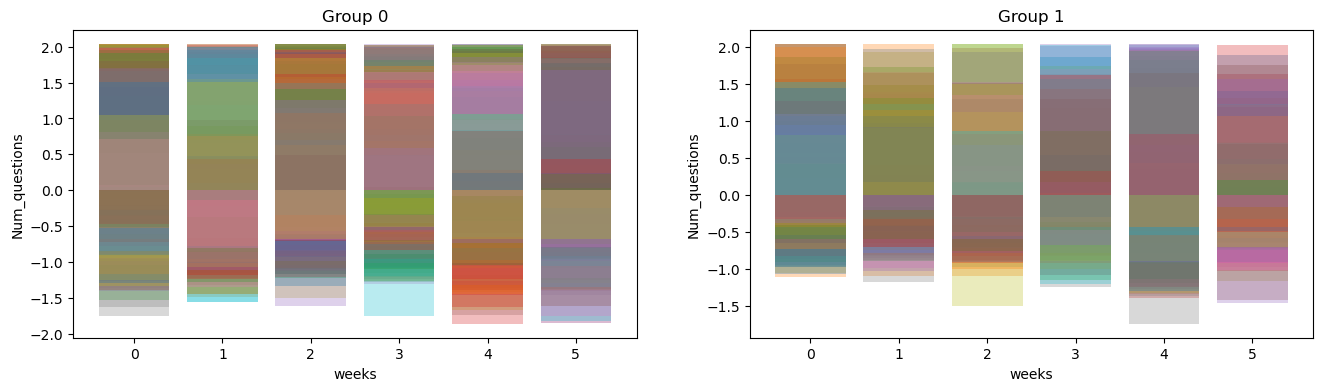

_________________________________________________________
window:  6
Group 0 has 369 students
Group 1 has 75 students


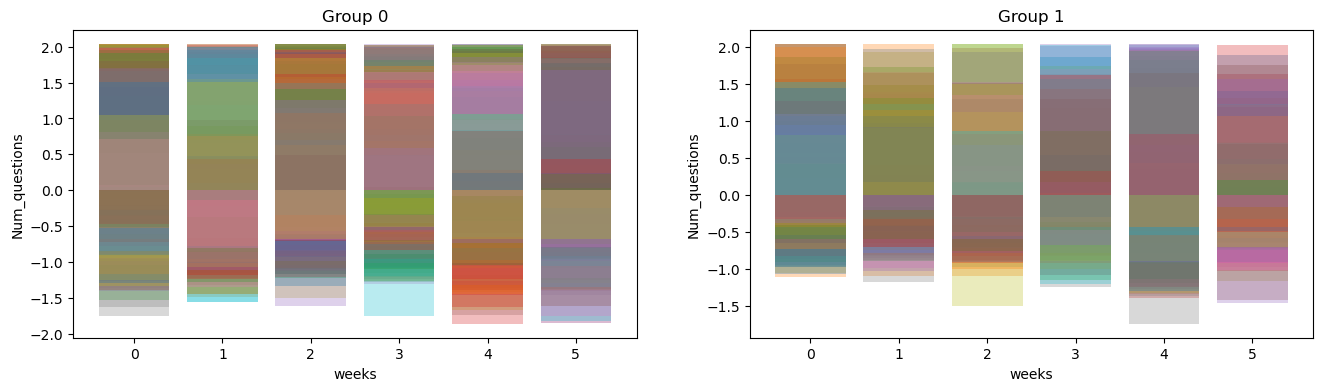

_________________________________________________________


In [12]:
gamma = 1
k = 2
for window in windows:
    print("window: ", window)
    D = D_for_window[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S, connectivity='epsilon')
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(data, kmeans.labels_, 6)
    print("_________________________________________________________")